/var/folders/x5/8_h973415pd6jcs8kqs894580000gr/T/ipykernel_7640/3118882535.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/var/folders/x5/8_h973415pd6jcs8kqs894580000gr/T/ipykernel_7640/3118882535.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/Users/laura/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


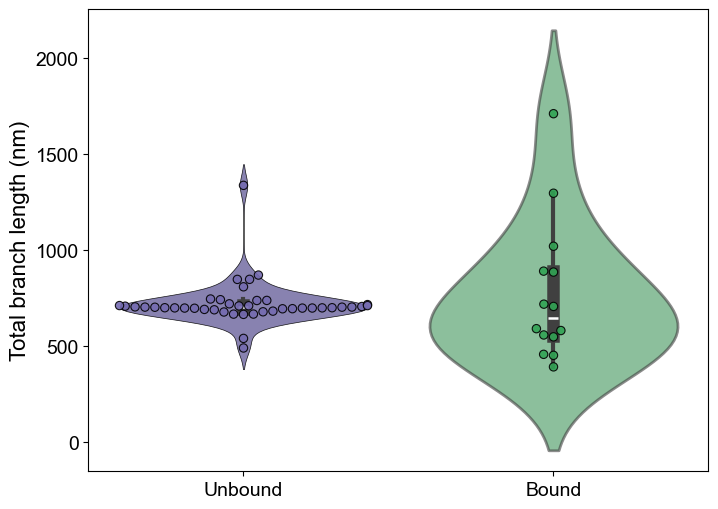

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

file_path = "/Volumes/shared/pyne_group/Shared/AFM_Data/Telomeres/Laura_shelterin-paper/output/all_statistics.csv"  
df = pd.read_csv(file_path)

# Extract the last two parts of the file path
df["basename"] = df["basename"].astype(str).apply(lambda x: "/".join(os.path.normpath(x).split(os.sep)[-2:]))

# Select specific basenames
selected_basenames = ["Controls/TEL80_magnesium", "Shelterin/TEL80"]
df = df[df["basename"].isin(selected_basenames)]

# Group by "image" and "grain_number"
grouped = df.groupby(["image", "grain_number"])

# Identify "bound" grains (those containing both class 1 and 2)
bound_keys = {key for key, group in grouped if {1, 2}.issubset(set(group["class_number"]))}

# Create "bound" and "unbound" DataFrames
df["category"] = df.set_index(["image", "grain_number"]).index.map(lambda x: "Bound" if x in bound_keys else "Unbound")

# Keep only the first value for "total_branch_lengths" per (basename, image, grain_number)
filtered_plot_df = df.groupby(["basename", "image", "grain_number", "category"]).first().reset_index()

# Multiply total_branch_lengths by 1e9
filtered_plot_df["total_branch_lengths"] *= 1e9

# Compute medians (after scaling)
category_medians = filtered_plot_df.groupby("category")["total_branch_lengths"].median()

# Define the list of (image, grain_number) combinations to remove
remove_combos = [("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00016", 3), ("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00019", 5), ("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00018",1), ("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00016", 0), ("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00018", 2)]

# Filter out the combinations from the DataFrame
filtered_plot_df = filtered_plot_df[~filtered_plot_df[["image", "grain_number"]].apply(tuple, axis=1).isin(remove_combos)]

# Set global font to Arial
plt.rcParams["font.family"] = "Arial"

# Set Tab20c colors
tab20c_palette = sns.color_palette("tab20c")
category_colors = {"Bound": tab20c_palette[8], "Unbound": tab20c_palette[12]}  # Adjusted colors

# Plotting
plt.figure(figsize=(8, 6))

# Violin plot with outer edges slightly less transparent
ax = sns.violinplot(
    x="category",
    y="total_branch_lengths",
    data=filtered_plot_df,
    inner="box",
    palette=category_colors,
    alpha=0.6,
    linewidth=2
)

# Overlay violin outlines with less transparency
for violin, color in zip(ax.collections[::2], category_colors.values()):
    violin.set_edgecolor('black')
    violin.set_alpha(0.9)
    violin.set_linewidth(0.5)

# Swarm plot (individual data points, same color as violins, with black edge)
sns.swarmplot(
    x="category",
    y="total_branch_lengths",
    data=filtered_plot_df,
    size=6,
    alpha=0.9,
    edgecolor="black",
    linewidth=0.8,
    palette=category_colors
)


# Formatting
plt.title("", fontsize=18)
plt.xlabel("", fontsize=16)
plt.ylabel("Total branch length (nm)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

category
+TEL80     710.006400
Control    698.251206
Name: total_branch_lengths, dtype: float64


/var/folders/x5/8_h973415pd6jcs8kqs894580000gr/T/ipykernel_75478/2511703478.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


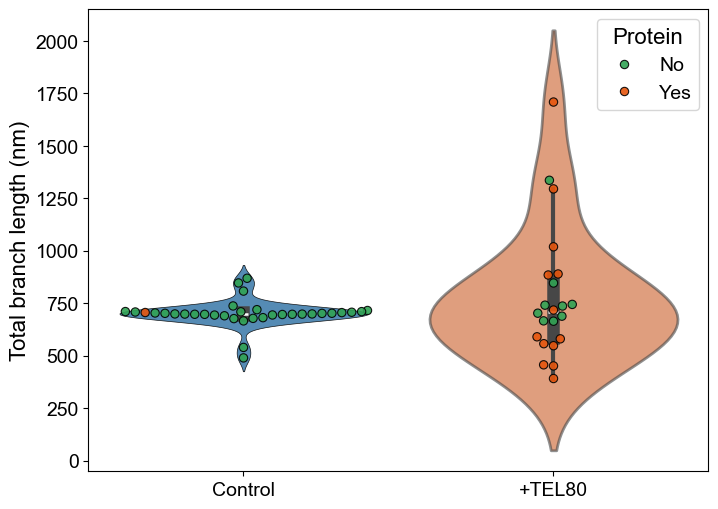

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load the CSV file
file_path = "/Volumes/shared/pyne_group/Shared/AFM_Data/Telomeres/Laura_shelterin-paper/output/all_statistics.csv"  
df = pd.read_csv(file_path)

# Extract the last two parts of the file path
df["basename"] = df["basename"].astype(str).apply(lambda x: "/".join(os.path.normpath(x).split(os.sep)[-2:]))

# Select specific basenames
selected_basenames = ["Controls/TEL80_magnesium", "Shelterin/TEL80"]
df = df[df["basename"].isin(selected_basenames)]

# Group by "image" and "grain_number"
grouped = df.groupby(["image", "grain_number"])

# Identify "bound" grains (those containing both class 1 and 2)
bound_keys = {key for key, group in grouped if {1, 2}.issubset(set(group["class_number"]))}

# Create "Control" and "+TEL80" categories
df["category"] = df["basename"].apply(lambda x: "Control" if "Controls" in x else "+TEL80")

# Create the 'bound_status' column for categorizing 'bound' or 'unbound' grains in +TEL80
df["bound_status"] = df.apply(
    lambda row: "bound" if (row["image"], row["grain_number"]) in bound_keys else "unbound",
    axis=1
)

# Keep only the first value for "total_branch_lengths" per (basename, image, grain_number)
filtered_plot_df = df.groupby(["basename", "image", "grain_number", "category", "bound_status"]).first().reset_index()

# Multiply total_branch_lengths by 1e9
filtered_plot_df["total_branch_lengths"] *= 1e9

# Compute medians (after scaling)
category_medians = filtered_plot_df.groupby("category")["total_branch_lengths"].median()
print(f"{category_medians}")

# Define the list of (image, grain_number) combinations to remove
remove_combos = [
    ("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00016", 3), 
    ("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00019", 5), 
    ("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00018", 1), 
    ("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00016", 0), 
    ("20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00018", 2)
]

# Filter out the unwanted (image, grain_number) combinations
filtered_plot_df = filtered_plot_df[~filtered_plot_df[["image", "grain_number"]].apply(tuple, axis=1).isin(remove_combos)]

# Set global font to Arial
plt.rcParams["font.family"] = "Arial"

# Set Tab20c colors
tab20c_palette = sns.color_palette("tab20c")
category_colors = {"Control": tab20c_palette[0], "+TEL80": tab20c_palette[4]}  # Added color for +TEL80

# Update color palette for bound/unbound status in +TEL80
bound_unbound_colors = {"bound": tab20c_palette[4], "unbound": tab20c_palette[8]}

# Plotting
plt.figure(figsize=(8, 6))

# Violin plot with outer edges slightly less transparent
ax = sns.violinplot(
    x="category",
    y="total_branch_lengths",
    data=filtered_plot_df,
    inner="box",
    palette=category_colors,
    alpha=0.6,
    linewidth=2
)

# Overlay violin outlines with less transparency
for violin in ax.collections[::2]:
    violin.set_edgecolor('black')
    violin.set_alpha(0.9)
    violin.set_linewidth(0.5)

# Swarm plot (individual data points, color by bound_status)
sns.swarmplot(
    x="category",
    y="total_branch_lengths",
    data=filtered_plot_df,
    size=6,
    alpha=0.9,
    edgecolor="black",
    linewidth=0.8,
    hue="bound_status",  # Color by bound_status
    palette=bound_unbound_colors  # Adjusting colors for bound/unbound
)

# Customizing the legend
handles, labels = ax.get_legend_handles_labels()

# Modify legend labels if needed
legend_labels = ['No', 'Yes']

# Set legend with the modified labels
plt.legend(handles, legend_labels, title="Protein", fontsize=14, title_fontsize=16)

# Formatting
plt.title("", fontsize=18)
plt.xlabel("", fontsize=16)
plt.ylabel("Total branch length (nm)", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

In [23]:
import pandas as pd

# Load the CSV file
file_path = "/Volumes/shared/pyne_group/Shared/AFM_Data/Telomeres/Laura_shelterin-paper/all_outputs/all_statistics.csv"  
df = pd.read_csv(file_path)

# Create a new concatenated column for image, grain_number, class_number, and subgrain_number
df['identifier'] = df['image'].astype(str) + "_" + df['grain_number'].astype(str) + "_" + df['class_number'].astype(str) + "_" + df['subgrain_number'].astype(str)

# Select the columns you're interested in
summary_table = df[['category', 'identifier', 'total_branch_lengths', 'volume']]

# Display the resulting table
print(summary_table.head())

        category                                         identifier  \
0  Control_TEL80  20230324_25mM_MgCl2immobilise_3mM_NiCl2image_1...   
1  Control_TEL80  20230324_25mM_MgCl2immobilise_3mM_NiCl2image_1...   
2  Control_TEL80  20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4...   
3  Control_TEL80  20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4...   
4  Control_TEL80  20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4...   

   total_branch_lengths        volume  
0          6.990000e-07  1.060000e-23  
1          6.970000e-07  1.040000e-23  
2          6.770000e-07  7.900000e-24  
3                   NaN  2.910000e-25  
4          6.990000e-07  8.320000e-24  


In [ ]:
import pandas as pd

# Load the CSV file
file_path = "/Volumes/shared/pyne_group/Shared/AFM_Data/Telomeres/Laura_shelterin-paper/all_outputs/all_statistics.csv"  
df = pd.read_csv(file_path)

# Use "|" or "__" as a separator to avoid confusion with underscores in file names
df['identifier'] = df['image'].astype(str) + "|" + df['grain_number'].astype(str) + "|" + df['class_number'].astype(str)

# Process class 1 (get first total_branch_length)
class1_df = df[df["class_number"] == 1].groupby(["category", "identifier"])["total_branch_lengths"].first().reset_index()

# Process class 2 (sum volume)
class2_df = df[df["class_number"] == 2].groupby(["category", "identifier"])["volume"].sum().reset_index()

# Merge the two dataframes
final_table = pd.merge(class1_df, class2_df, on=["category", "identifier"], how="outer")

# Rename columns for clarity
final_table.rename(columns={"total_branch_lengths": "total_branch_length_dna", "volume": "volume_protein"}, inplace=True)

print(final_table.to_string())

             category                                                               identifier  total_branch_length_dna  volume_protein
0       Control_TEL12                       20230117_7ng_picoz_topo_tel12_mgni_eph.0_00007|0|1             3.380000e-08             NaN
1       Control_TEL12                      20230117_7ng_picoz_topo_tel12_mgni_eph.0_00007|10|1             4.680000e-07             NaN
2       Control_TEL12                      20230117_7ng_picoz_topo_tel12_mgni_eph.0_00007|11|1             2.820000e-07             NaN
3       Control_TEL12                      20230117_7ng_picoz_topo_tel12_mgni_eph.0_00007|12|1             1.950000e-07             NaN
4       Control_TEL12                       20230117_7ng_picoz_topo_tel12_mgni_eph.0_00007|1|1             2.470000e-07             NaN
5       Control_TEL12                       20230117_7ng_picoz_topo_tel12_mgni_eph.0_00007|2|1             9.400000e-07             NaN
6       Control_TEL12                       2023

/var/folders/x5/8_h973415pd6jcs8kqs894580000gr/T/ipykernel_75478/750634862.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


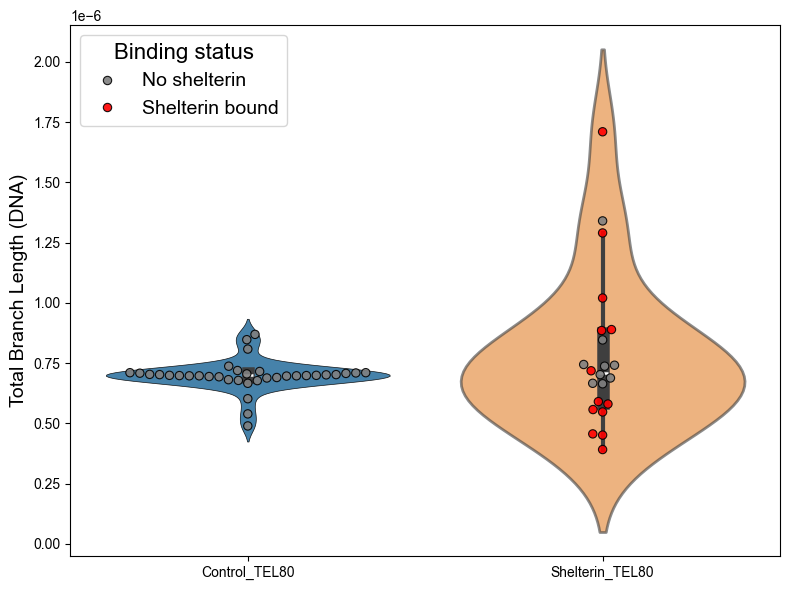

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/Volumes/shared/pyne_group/Shared/AFM_Data/Telomeres/Laura_shelterin-paper/all_outputs/all_statistics.csv"  
df = pd.read_csv(file_path)

# Use "|" to concatenate identifiers, excluding subgrain number
df['identifier'] = df['image'].astype(str) + "|" + df['grain_number'].astype(str) + "|" + df['class_number'].astype(str)

# Extract base identifier (before last "|") to group molecules
df['base_identifier'] = df['image'].astype(str) + "|" + df['grain_number'].astype(str)

# Process class 1 (first total_branch_length)
class1_df = df[df["class_number"] == 1].groupby(["category", "identifier"])["total_branch_lengths"].first().reset_index()

# Process class 2 (sum volume for protein presence)
class2_df = df[df["class_number"] == 2].groupby(["category", "identifier"])["volume"].sum().reset_index()

# Merge the two dataframes
final_table = pd.merge(class1_df, class2_df, on=["category", "identifier"], how="outer")

# Rename columns for clarity
final_table.rename(columns={"total_branch_lengths": "total_branch_length_dna", "volume": "volume_protein"}, inplace=True)

# Extract base identifier for protein binding check
final_table["base_identifier"] = final_table["identifier"].str.rsplit("|", n=1).str[0]

# Merge duplicate entries by taking the first non-NaN value per base_identifier
merged_final_table = (
    final_table.groupby(["category", "base_identifier"])
    .agg({
        "total_branch_length_dna": "first",  # Take first valid total_branch_length_dna
        "volume_protein": "first",  # Take first valid volume_protein
    })
    .reset_index()
)

# Ensure `bound_status` is computed correctly after merging
merged_final_table["bound_status"] = merged_final_table["volume_protein"].apply(lambda x: "Yes" if pd.notna(x) and x > 0 else "No")

# Remove specific base_identifiers (Example: list of identifiers to remove)
base_identifiers_to_remove = [
                            '20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00019|5',
                            "20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00018|1",
                            "20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00039|1",
                            "20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00016|3",
                            "20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00030|2"
                             ]  # Replace with the actual identifiers to remove
filtered_plot_df = merged_final_table[~merged_final_table["base_identifier"].isin(base_identifiers_to_remove)]

# Filter only Control_TEL80 and Shelterin_TEL80
filtered_plot_df = filtered_plot_df[filtered_plot_df["category"].isin(["Control_TEL80", "Shelterin_TEL80"])]

# Define colors for categories and bound status
category_colors = {"Control_TEL80": "#1f77b4", "Shelterin_TEL80": "#ff7f0e"}
bound_unbound_colors = {"No": "gray", "Yes": "red"}

# Plotting
plt.figure(figsize=(8, 6))
ax = sns.violinplot(
    x="category",
    y="total_branch_length_dna",
    data=filtered_plot_df,
    inner="box",
    palette=category_colors,
    alpha=0.6,
    linewidth=2
)

# Overlay violin outlines with less transparency
for violin in ax.collections[::2]:
    violin.set_edgecolor('black')
    violin.set_alpha(0.9)
    violin.set_linewidth(0.5)

# Swarm plot (individual data points, color by bound_status)
sns.swarmplot(
    x="category",
    y="total_branch_length_dna",
    data=filtered_plot_df,
    size=6,
    alpha=0.9,
    edgecolor="black",
    linewidth=0.8,
    hue="bound_status",
    palette=bound_unbound_colors
)

# Customizing the legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ["No shelterin", "Shelterin bound"], title="Binding status", fontsize=14, title_fontsize=16)

# Titles and labels
plt.xlabel("")
plt.ylabel("Total Branch Length (DNA)", fontsize=14)
plt.title("", fontsize=16)

plt.tight_layout()
plt.show()

In [86]:
# Split into two dataframes based on category
control_df = filtered_plot_df[filtered_plot_df["category"] == "Control_TEL80"].sort_values(by="total_branch_length_dna", ascending=False)
shelterin_df = filtered_plot_df[filtered_plot_df["category"] == "Shelterin_TEL80"].sort_values(by="total_branch_length_dna", ascending=False)

# Print sorted tables separately
print("\n--- Control_TEL80 ---")
print(control_df[["base_identifier", "category", "total_branch_length_dna", "volume_protein", "bound_status"]].to_string(index=False))

print("\n--- Shelterin_TEL80 ---")
print(shelterin_df[["base_identifier", "category", "total_branch_length_dna", "volume_protein", "bound_status"]].to_string(index=False))


--- Control_TEL80 ---
                                                    base_identifier      category  total_branch_length_dna  volume_protein bound_status
20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00030|1 Control_TEL80             8.690000e-07             NaN           No
20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00019|2 Control_TEL80             8.470000e-07             NaN           No
20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00019|4 Control_TEL80             8.080000e-07             NaN           No
20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00016|2 Control_TEL80             7.370000e-07             NaN           No
20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00018|3 Control_TEL80             7.190000e-07             NaN           No
20230324_25mM_MgCl2immobilise_3mM_NiCl2image_4ng_PLCOZ_LH.0_00033|0 Control_TEL80             7.150000e-07             NaN           No
20230324_25mM_MgCl2immobi

/var/folders/x5/8_h973415pd6jcs8kqs894580000gr/T/ipykernel_75478/3285481108.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_final_table["volume_protein"].fillna(0, inplace=True)


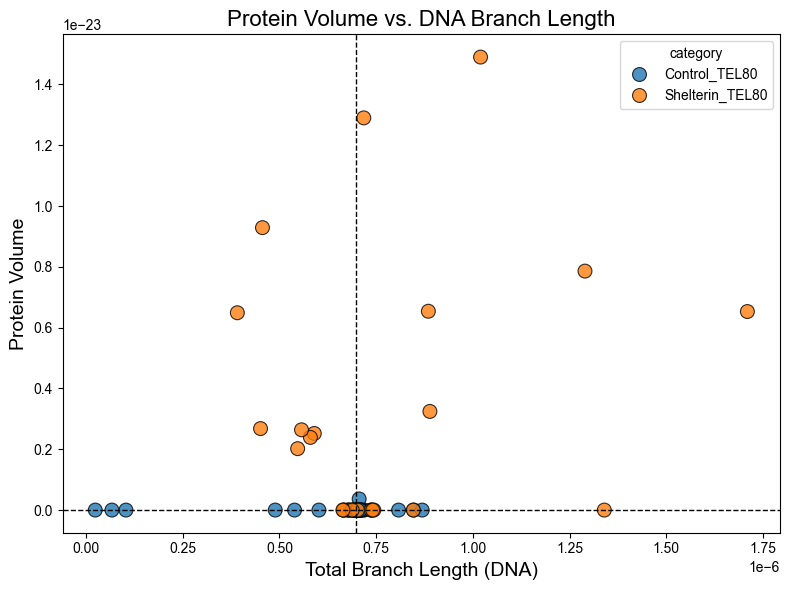

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/Volumes/shared/pyne_group/Shared/AFM_Data/Telomeres/Laura_shelterin-paper/all_outputs/all_statistics.csv"  
df = pd.read_csv(file_path)

# Use "|" to concatenate identifiers, excluding subgrain number
df['identifier'] = df['image'].astype(str) + "|" + df['grain_number'].astype(str) + "|" + df['class_number'].astype(str)

# Extract base identifier (before last "|") to group molecules
df['base_identifier'] = df['image'].astype(str) + "|" + df['grain_number'].astype(str)

# Process class 1 (first total_branch_length)
class1_df = df[df["class_number"] == 1].groupby(["category", "identifier"])["total_branch_lengths"].first().reset_index()

# Process class 2 (sum volume for protein presence)
class2_df = df[df["class_number"] == 2].groupby(["category", "identifier"])["volume"].sum().reset_index()

# Merge the two dataframes
final_table = pd.merge(class1_df, class2_df, on=["category", "identifier"], how="outer")

# Rename columns for clarity
final_table.rename(columns={"total_branch_lengths": "total_branch_length_dna", "volume": "volume_protein"}, inplace=True)

# Extract base identifier for protein binding check
final_table["base_identifier"] = final_table["identifier"].str.rsplit("|", n=1).str[0]

# Merge duplicate entries by taking the first non-NaN value per base_identifier
merged_final_table = (
    final_table.groupby(["category", "base_identifier"])
    .agg({
        "total_branch_length_dna": "first",  # Take first valid total_branch_length_dna
        "volume_protein": "first",  # Take first valid volume_protein
    })
    .reset_index()
)

# Replace NaN values in volume_protein with 0
merged_final_table["volume_protein"].fillna(0, inplace=True)

# Ensure `bound_status` is computed correctly after merging
merged_final_table["bound_status"] = merged_final_table["volume_protein"].apply(lambda x: "Yes" if x > 0 else "No")

# Filter only Control_TEL80 and Shelterin_TEL80 for the scatter plot
filtered_plot_df = merged_final_table[merged_final_table["category"].isin(["Control_TEL80", "Shelterin_TEL80"])]

# Scatter plot: Protein Volume vs. Total Branch Length (DNA)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="total_branch_length_dna",
    y="volume_protein",
    hue="category",  # Use category for color differentiation
    data=filtered_plot_df,
    palette={"Control_TEL80": "#1f77b4", "Shelterin_TEL80": "#ff7f0e"},
    edgecolor="black",
    alpha=0.8,
    s=100  # Adjust marker size
)

# Add quadrant lines (median-based)
median_dna = filtered_plot_df['total_branch_length_dna'].median()
median_protein = filtered_plot_df['volume_protein'].median()

# Add vertical and horizontal lines at the medians to divide the quadrants
plt.axvline(x=median_dna, color='black', linestyle='--', lw=1)  # Vertical line (DNA)
plt.axhline(y=median_protein, color='black', linestyle='--', lw=1)  # Horizontal line (Protein)

# Titles and labels
plt.xlabel("Total Branch Length (DNA)", fontsize=14)
plt.ylabel("Protein Volume", fontsize=14)
plt.title("Protein Volume vs. DNA Branch Length", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()